# <b>Studi Kasus: Menentukan Strategi Pemasaran Perusahaan Teknologi Kesehatan</b>
---

## Latar Belakang Kasus
Sebagai seorang data analis junior yang bekerja di tim analis pemasaran di perusahaan Bellabeat, yang merupakan produsen produk kesehatan wanita berteknologi tinggi. Bellabeat adalah perusahaan kecil yang sukses, meski demikian perusahaan ini memiliki potensi untuk menjadi pemain yang lebih besar di pasar perangkat pintar global.

Urška Sršen, salah satu pendiri dan Chief Creative Officer Bellabeat, percaya bahwa menganalisis data kebugaran dari perangkat pintar dapat membantu membuka peluang pertumbuhan baru bagi perusahaan. 

Saya telah diminta untuk fokus pada salah satu produk Bellabeat dan menganalisis data perangkat pintar untuk mendapatkan wawasan tentang bagaimana konsumen menggunakan perangkat pintar mereka. Wawasan yang saya temukan akan membantu memandu strategi pemasaran perusahaan. 

## 1. <i>Ask</i>
### 1.1 Tugas bisnis
   Menganalisis data penggunaan perangkat pintar untuk mendapatkan wawasan tentang bagaimana konsumen menggunakan perangkat pintar non-Bellabeat dan menerapkannya pada salah satu produk Bellabeat. Kemudian, dengan menggunakan informasi ini dapat membantu penyusunan strategi pemasaran Bellabeat.

### 1.2 Pertanyaan analisis
* Apa saja tren dalam penggunaan perangkat pintar?
* Bagaimana tren ini dapat diterapkan pada pelanggan Bellabeat?
* Bagaimana tren ini dapat membantu memengaruhi strategi pemasaran Bellabeat?


### 1.3 Pemangku kepentingan utama
* Urška Sršen: Salah satu pendiri Bellabeat dan Chief Creative Officer
* Sando Mur: Matematikawan dan salah satu pendiri Bellabeat; anggota kunci dari tim eksekutif Bellabeat
* Tim analisis pemasaran Bellabeat: Sebuah tim analis data yang bertanggung jawab untuk mengumpulkan, menganalisis, dan melaporkan data yang dapat membantu penyusunan strategi pemasaran Bellabeat.



## 2. <i>Prepare</i>
### 2.1 Sumber data
* Dataset yang digunakan dalam analisis ini berasal dari __[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)__.
* Lisensi: (CC0: Public Domain).
* Dataset tersedia melalui Mobius yang terdapat di platform Kaggle.

### 2.2 Informasi tentang dataset
Dataset ini dihasilkan oleh responden survei yang didistribusikan melalui Amazon Mechanical Turk antara 03.12.2016-05.12.2016. Tiga puluh pengguna Fitbit yang memenuhi syarat menyetujui untuk mengirimkan data pelacak pribadi, termasuk aktivitas fisik, detak jantung, dan pemantauan tidur. Setiap laporan dapat diuraikan menurut ID dan juga sampel waktu. Variasi yang dihasilkan menunjukkan penggunaan berbagai jenis pelacak Fitbit dan perilaku setiap individu.

### 2.3 Aksesibilitas dan privasi data
Dataset ini memenuhi aksesibilitas karena dapat diakses secara publik, dan bersifat <i>open-source</i>. Privasi data pun telah terpenuhi, dikarenakan semua informasi pribadi yang terdapat pada dataset ini telah dianonimisasikan.

### 2.4 Organisasi data
Dataset memiliki 18 dokumen CSV, dimana setiap dokumen merepresentasikan data kuantitatif yang di lacak oleh FitBit. Dokumen memiliki format <i>long data</i>, karena setiap subjek memiliki data dalam beberapa baris. Setiap user memiliki <i>Uniqe ID</i>  dan baris yang berbeda, karena data dilacak berdasarkan hari dan waktu.

Berikut merupakan dari ringkasan dari dataset yang digunakan:

In [1]:
install.packages("skimr")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
install.packages("janitor")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [3]:
install.packages("here")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [4]:
install.packages("ggpubr")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘KernSmooth’, ‘lava’, ‘rpart’, ‘survival’, ‘prodlim’, ‘class’, ‘proxy’, ‘codetools’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘foreign’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’




In [5]:
library(tidyverse)
library(lubridate)
library(here)
library(skimr)
library(janitor)
library(ggpubr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


here() starts at /home/jovyan


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [6]:
#Mengimpor dataset 
daily_activity <- read_csv("dailyActivity_merged.csv")
daily_calories <- read_csv("dailyCalories_merged.csv")
daily_intensities <- read_csv("dailyIntensities_merged.csv")
daily_steps <- read_csv("dailySteps_merged.csv")
daily_sleep <- read_csv("sleepDay_merged.csv")
heart_rate <- read_csv("heartrate_seconds_merged.csv")
weight_info <- read_csv("weightLogInfo_merged.csv")
hourly_steps <- read_csv("hourlySteps_merged.csv")

#Dataset summarise--
#dataframes kedalam list
data_frames <- list(
    daily_activity,
    daily_calories,
    daily_intensities,
    daily_steps,
    daily_sleep,
    heart_rate,
    weight_info,
    hourly_steps
)

files <- c(
    "dailyActivity_merged.csv",
    "dailyCalories_merged.csv",
    "dailyIntensities_merged.csv",
    "dailySteps_merged.csv",
    "sleepDay_merged.csv",
    "heartrate_seconds_merged.csv",
    "weightLogInfo_merged.csv",
    "hourlySteps_merged.csv"
)

#menghitung karakteristik dataset 
num_var = num_row <- c()
for(i in 1:length (data_frames)){
    num_var <- append(num_var, ncol(data_frames[[i]]))
    num_row <- append(num_row, nrow(data_frames[[i]]))
}

#penamaan variabel setiap dataset
get.col.names <- function(dataset) {
  var_names <- paste(colnames(dataset),collapse=", ")
}

#memasukkan summary values ke dataframe
summarise <- data.frame(
    Datasets = files,
    Variables = unlist(lapply(data_frames, get.col.names)),
    'Num of Variables' = num_var,
    'Num of Rows' = num_row
)

View(summarise)

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify

Datasets,Variables,Num.of.Variables,Num.of.Rows
<chr>,<chr>,<int>,<int>
dailyActivity_merged.csv,"Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories",15,940
dailyCalories_merged.csv,"Id, ActivityDay, Calories",3,940
dailyIntensities_merged.csv,"Id, ActivityDay, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, SedentaryActiveDistance, LightActiveDistance, ModeratelyActiveDistance, VeryActiveDistance",10,940
dailySteps_merged.csv,"Id, ActivityDay, StepTotal",3,940
sleepDay_merged.csv,"Id, SleepDay, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed",5,413
heartrate_seconds_merged.csv,"Id, Time, Value",3,2483658
weightLogInfo_merged.csv,"Id, Date, WeightKg, WeightPounds, Fat, BMI, IsManualReport, LogId",8,67
hourlySteps_merged.csv,"Id, ActivityHour, StepTotal",3,22099


Beberapa dataset digunakan untuk menjawab tugas bisnis yang berfokus pada cara <i>user</i> menggunakan <i>smart device</i> ini, yang diantaranya:
* daily_activity
* daily_calories
* daily_intensities
* daily_steps
* daily_sleep
* heart_rate
* weight_info
* hourly_steps

### 2.5 Kredibilitas data
Data ini berasal dari 33 user FitBit yang berisikan <i>minutes-level output</i> dari aktifitas fisik, <i>heart rate</i> dan <i>sleep monitoring</i>. Data ini bisa dikatakan baik karena berbagai macam aspek data yang dihasilkan <i>oleh smart device</i>  sehingga merepresentasikan kebiasaan dari pengguna. Pada dataset ini terdapat masalah pada sampling yang tidak merepresentasikan keseluruhan populasi karena limitasi dari user (hanya 33 user). Dan juga terdapat masalah pada kebaruan dan relevansi data, karena limitasi pada pengambilan sample yang hanya 2 bulan.

## 3. Process
Pada fase <i>Process</i> ini dilakukan beberapa tahapan. Tahapan pertama yaitu pembersihan data dengan menghapus duplikat dan <i>missing value</i> jika memang memungkinkan. Kemudian memformat data seperti merubah nama kolom, tanggal, waktu dan lain sebagainya. Terakhir menggabunngkan beberapa data menjadi satu data frame agar memudahkan ketika melakukan analisis. 

###  3.1 Memeriksa setiap dataframe yang digunakan

In [7]:
head(daily_activity)
head(daily_calories)
head(daily_intensities)
head(daily_steps)
head(daily_sleep)
head(heart_rate)
head(weight_info)
head(hourly_steps)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Setelah dikakukan pemeriksaan data, didapatkan dataset daily_calories, daily_intensities dan daily_steps merupkan subset dari daily_activity, maka hanya digunakan dataset daily_activity menjadi satu dataframe.

### 3.2 Memverifikasi jumlah user

In [8]:
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(heart_rate$Id)
n_distinct(weight_info$Id)
n_distinct(hourly_steps$Id)

[1] 33

[1] 24

[1] 14

[1] 8

[1] 33

Setelah dilakukannya verifikasi jumlah user, didapatkan perbedaan jumlah user pada dataset. Perbedaan yang signifikan terdapat pada dataset heart_rate dan weight_info yang memilika jumlah sample yang kecil, maka tidak akan digunakan dalam studi kasus ini. Pada dataset sleep_day memiliki jumlah sample yang tidak sama dengan daily_activity, namun tetap digunakan sabagai referensi. Dataset hourly_steps digunakan untuk menganalisis penggunaan device setiap jam nya setiap hari dalam seminggu.

### 3.3 Mengecek duplikat dan missing value yang ada pada data

In [9]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_steps))
sum(duplicated(heart_rate))
sum(duplicated(weight_info))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

In [10]:
sum(is.na(daily_activity))
sum(is.na(daily_sleep))
sum(is.na(hourly_steps))
sum(is.na(heart_rate))
sum(is.na(weight_info))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 65

Terdapat missing value pada data weight_info, namun tidak dilakukan penghapusan missing value, karena metrik yang akan diukur hanya berfokus pada jumlah user.

#### Menghapus duplikat

In [11]:
daily_sleep <- daily_sleep %>% 
  distinct()

sum(duplicated(daily_sleep))

[1] 0

Sekarang duplikat yang ada di sleep_day telah dihapus.

### 3.4 Membersihkan dan mengganti nama kolom

Fungsi clean_names digunakan untuk memberikan keunikan dan konsistensi pada penamaan kolom, dan juga memformat keseluruhan kolom menjadi lower case.

In [12]:
daily_activity <- clean_names(daily_activity)
daily_sleep <- clean_names(daily_sleep)
hourly_steps <- clean_names(hourly_steps)
heart_rate <- clean_names(heart_rate)
weight_info <- clean_names(weight_info)

In [13]:
colnames(daily_activity)
colnames(daily_sleep)
colnames(hourly_steps)
colnames(heart_rate)
colnames(weight_info)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"

[1] "id"            "activity_hour" "step_total"

[1] "id"    "time"  "value"

[1] "id"               "date"             "weight_kg"        "weight_pounds"   
[5] "fat"              "bmi"              "is_manual_report" "log_id"

### 3.5 Mengkonversi format tanggal dan waktu

Untuk menjaga konsistensi dari date-time, maka diperlukan pembersihan pada date-time dari kedua dataframe sebelum di merging.

In [14]:
daily_activity <- daily_activity %>% 
  rename(date = activity_date) %>% 
  mutate(date = as_date(date, format="%m/%d/%Y"))

daily_sleep <- daily_sleep %>% 
  rename(date = sleep_day) %>% 
  mutate(date = as_date(date, format="%m/%d/%Y"))

hourly_steps <- hourly_steps %>% 
  rename(date_time = activity_hour) %>% 
  mutate(date_time = as.POSIXct(date_time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone()))

heart_rate <- heart_rate %>% 
  rename(date_time = time) %>% 
  mutate(date_time = as.POSIXct(date_time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone()))

weight_info <- weight_info %>% 
  rename(date_time = date) %>% 
  mutate(date_time = as.POSIXct(date_time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone()))


head(daily_activity)
head(daily_sleep)
head(hourly_steps)
head(heart_rate)
head(weight_info)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


id,date_time,step_total
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


id,date_time,value
<dbl>,<dttm>,<dbl>
2022484408,2016-04-12 07:21:00,97
2022484408,2016-04-12 07:21:05,102
2022484408,2016-04-12 07:21:10,105
2022484408,2016-04-12 07:21:20,103
2022484408,2016-04-12 07:21:25,101
2022484408,2016-04-12 07:22:05,95


id,date_time,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,TRUE,1.460938e+12


### 3.6 Menggabungkan data

Menggabungkan data daily_activity dan daily_sleep untuk melihat berbagai macam korelasi diantara keduanya, yang berdasarkan id dan date.

In [15]:
all_activity_merged <- merge(daily_activity, daily_sleep, by=c("id","date"))
head(all_activity_merged)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


## 4. <i>Analyze and Share</i>
### 4.1 Mengeksplorasi aktifitas harian

In [16]:
#explore daily steps, calories and sleep 
all_activity_merged %>% 
  select(total_steps, calories, total_minutes_asleep) %>% 
  summary()

#explore num of active distance per category
all_activity_merged %>% 
  select(very_active_distance, moderately_active_distance, light_active_distance, sedentary_active_distance) %>% 
  summary()

#explore num of active minutes per category
all_activity_merged %>% 
  select(very_active_minutes, fairly_active_minutes, lightly_active_minutes, sedentary_minutes) %>% 
  summary()

  total_steps       calories    total_minutes_asleep
 Min.   :   17   Min.   : 257   Min.   : 58.0       
 1st Qu.: 5189   1st Qu.:1841   1st Qu.:361.0       
 Median : 8913   Median :2207   Median :432.5       
 Mean   : 8515   Mean   :2389   Mean   :419.2       
 3rd Qu.:11370   3rd Qu.:2920   3rd Qu.:490.0       
 Max.   :22770   Max.   :4900   Max.   :796.0       

 very_active_distance moderately_active_distance light_active_distance
 Min.   : 0.000       Min.   :0.0000             Min.   :0.010        
 1st Qu.: 0.000       1st Qu.:0.0000             1st Qu.:2.540        
 Median : 0.570       Median :0.4200             Median :3.665        
 Mean   : 1.446       Mean   :0.7439             Mean   :3.791        
 3rd Qu.: 2.360       3rd Qu.:1.0375             3rd Qu.:4.918        
 Max.   :12.540       Max.   :6.4800             Max.   :9.480        
 sedentary_active_distance
 Min.   :0.0000000        
 1st Qu.:0.0000000        
 Median :0.0000000        
 Mean   :0.0009268        
 3rd Qu.:0.0000000        
 Max.   :0.1100000        

 very_active_minutes fairly_active_minutes lightly_active_minutes
 Min.   :  0.00      Min.   :  0.00        Min.   :  2.0         
 1st Qu.:  0.00      1st Qu.:  0.00        1st Qu.:158.0         
 Median :  9.00      Median : 11.00        Median :208.0         
 Mean   : 25.05      Mean   : 17.92        Mean   :216.5         
 3rd Qu.: 38.00      3rd Qu.: 26.75        3rd Qu.:263.0         
 Max.   :210.00      Max.   :143.00        Max.   :518.0         
 sedentary_minutes
 Min.   :   0.0   
 1st Qu.: 631.2   
 Median : 717.0   
 Mean   : 712.1   
 3rd Qu.: 782.8   
 Max.   :1265.0   

Setelah dilakukan proses ekplosari pada aktifitas harian, didapatkan beberapa temuan yang diantaranya:
* Rata-rata langkah yang dilakukan *user* setiap harinya adalah 8515 langkah
* Rata-rata waktu tidur yang dilakukan *user* setiap harinya adalah 6,98 jam
* *Sedentary time* yang terlalu lama, secara rata-rata pengguna menghabiskan waktu selama 11,86 jam tanpa melakukan aktifitas apapun.
* Waktu aktif tertinggi hanya dilakukan dengan aktifitas ringan.


### 4.2 Mengelompokan pengguna menjadi 4 *activity levels*

Setelah didapatkan beberpa temuan yang menarik, terutama kebiasaan *user* dalam menggunakan *smart device* dalam aktifitas sehari-hari. Kita dapat mengklasifikasikan pengguna kedalam 4 level aktifitas yang berdasarkan total langkah harian. 4 level aktifitas herian ini berdasarkan __[artikel 10.000 Steps](https://www.10000steps.org.au/articles/healthy-lifestyles/counting-steps/)__, diantaranya:
* *Sedentary* sama dengan kurang dari 5.000 langkah per hari
* *Lightly active* sama dengan 5,000 hingga 7,499 langkah per hari
* *Fairly active* sama dengan 7,500 hingga 9,999 langkah per hari
* *Highly active* sama dengan lebih dari 10,000 langkah per hari 


In [17]:
#calculate the daily steps average by user and classify by 4 level activity
user_type <- all_activity_merged %>% 
  group_by(id) %>% 
  summarise(avg_daily_steps = mean(total_steps),
            avg_daily_calories = mean(calories),
            avg_daily_sleep = mean(total_minutes_asleep)) %>% 
  mutate(user_level = case_when(avg_daily_steps < 5000 ~ "Sedentary",
                                avg_daily_steps >= 5000 & avg_daily_steps < 7499 ~ "Lightly Active",
                                avg_daily_steps >= 7500 & avg_daily_steps < 9999 ~ "Fairly Active",
                                avg_daily_steps >= 10000 ~ "Highly Active"))

In [18]:
user_type$user_level <- ordered(
  user_type$user_level,
  levels = c("Highly Active", "Fairly Active", 
             "Lightly Active", "Sedentary"))
user_type <- arrange(user_type, user_level)
head(user_type)

id,avg_daily_steps,avg_daily_calories,avg_daily_sleep,user_level
<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1503960366,12405.68,1872.280,360.2800,Highly Active
3977333714,11218.00,1560.393,293.6429,Highly Active
4388161847,11034.35,3141.739,400.1739,Highly Active
7086361926,10290.50,2657.625,453.1250,Highly Active
8053475328,19078.67,3309.333,297.0000,Highly Active
1644430081,7967.75,2977.750,294.0000,Fairly Active


Membuat dataframe dengan persentase setiap tipe pengguna

In [19]:
user_type_percent <- user_type %>% 
  group_by(user_level) %>% 
  summarise(total = n()) %>% 
  mutate(total_percent = scales::percent (total/sum(total)))
head(user_type_percent)

user_level,total,total_percent
<ord>,<int>,<chr>
Highly Active,5,21%
Fairly Active,9,38%
Lightly Active,5,21%
Sedentary,5,21%


Memvisualisasikan *activity level distribution*

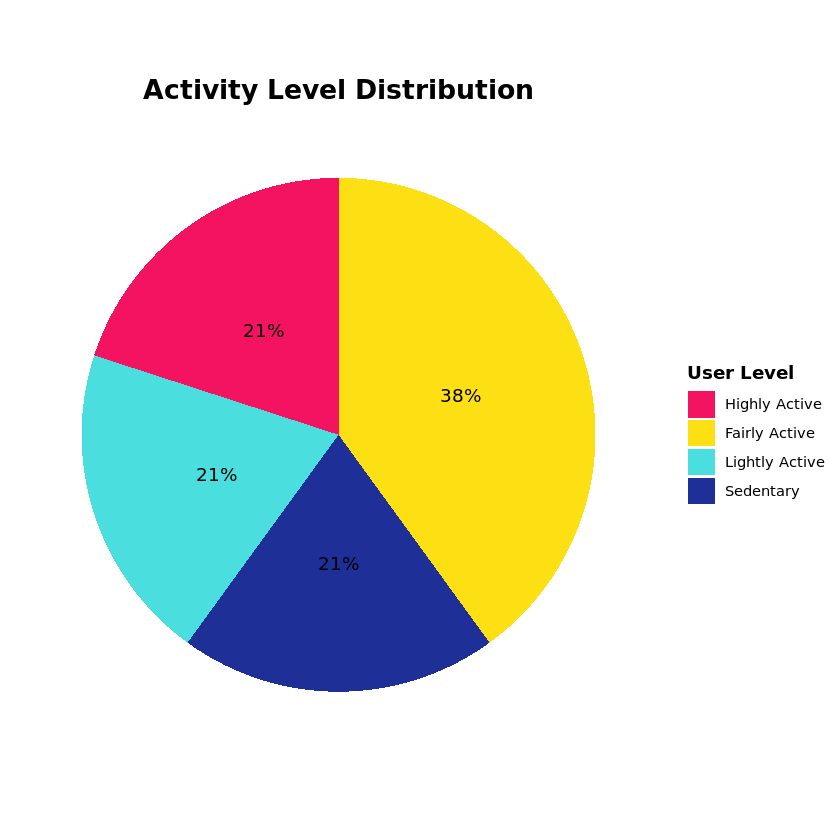

In [20]:
ggplot(data = user_type_percent, aes(x="", y=total_percent, fill=user_level))+
  geom_bar(stat = "identity", width=1)+
  geom_text(aes(label = total_percent),
             position = position_stack(vjust = 0.5),
             show.legend = FALSE)+
  coord_polar(theta = "y")+
  theme_minimal()+
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.border = element_blank(),
    panel.grid=element_blank(),
    axis.ticks = element_blank(),
    axis.text.x = element_blank(),
    legend.title = element_text(face="bold"),
    plot.title=element_text(vjust=1, hjust =0.5, size=16, face="bold"))+
  scale_fill_manual(values = c("#f41360","#fde014", "#4adede","#1f2f98"))+
  labs(title = "Activity Level Distribution", fill="User Level")

*User* dengan aktifitas harian *fairly active* memiliki nilai tertinggi dibandingkan dengan *user level* lainnya. Hal ini berdasarkan rata-rata langkah yang dilakukan *user* setiap harinya adalah 8515 langkah. 

### 4.3 Langkah harian selama satu minggu berdasarkan *activity level*

Setelah melihat distribusi dari setiap level aktivitas, analisis selanjutanya adalah untuk melihat trend aktivitas dari berbagai *user* setiap harinya dalam satu minggu. 

In [21]:
weekday_steps <- all_activity_merged %>% 
  mutate(weekday = weekdays(date)) %>% 
  left_join(user_type, by="id") %>% 
  group_by(user_level, weekday) %>% 
  summarise(daily_steps = mean(total_steps))

`summarise()` has grouped output by 'user_level'. You can override using the `.groups` argument.



In [22]:
weekday_steps$weekday <- ordered(
  weekday_steps$weekday, 
  levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
           "Friday", "Saturday", "Sunday"))
head(weekday_steps)

user_level,weekday,daily_steps
<ord>,<ord>,<dbl>
Highly Active,Friday,10420.083
Highly Active,Monday,12208.000
Highly Active,Saturday,14290.250
Highly Active,Sunday,10531.667
Highly Active,Thursday,9564.286
Highly Active,Tuesday,11907.000


Memvisualisasikan rata-rata langkah harian dalam satu minggu

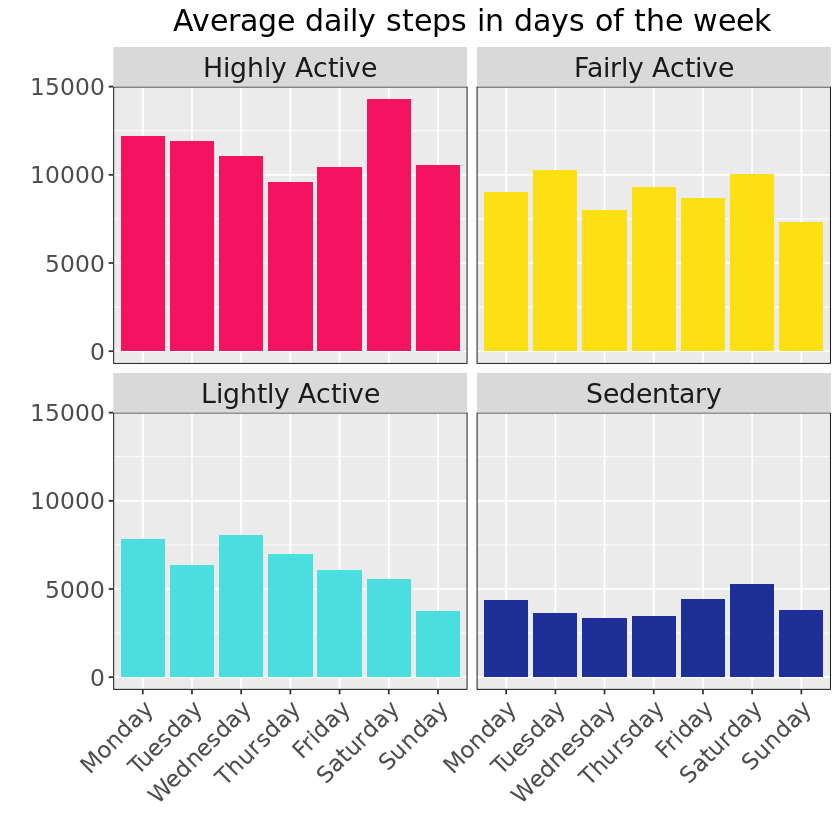

In [23]:
ggplot(weekday_steps, aes(x=weekday, y=daily_steps, group=user_level, fill=user_level))+
  geom_bar(stat = 'identity')+
  facet_wrap(vars(user_level))+
  scale_fill_manual(values = c("#f41360","#fde014", "#4adede","#1f2f98"))+
  labs(title = "Average daily steps in days of the week", x="", y="")+
  guides(x = guide_axis(angle = 45))+
  theme(axis.text.x = element_text(size = 14, vjust = 0.3),
        axis.text.y = element_text(size = 14),
        panel.border = element_rect(fill = 'transparent', color = 'black', size = .5),
        strip.text.x = element_text(size = 16),
        plot.title = element_text(size = 18, hjust = .5),
        legend.position = 'none')

Bagan yang dihasilkan tidak menunjukan pola tertentu pada jumlah langkah harian selama satu minggu dalam jenis *activity level* yang sama. Hal ini bisa terjadi dikarenakan jumlah titik data yang terlalu sedikit untuk setiap perhitungan. 

Wawasan yang bisa didapatkan pada bagan adalah kebiasaan selama satu minggu dari pengguna berdasarkan *activity level*.

### 4.4 *Activity level* selama satu hari dalam satu minggu

Analisis dilakukan dengan meilihat aktivitas selama 1 hari setiap jam nya. Hal ini dilakukan untuk mendapatkan wawasan mengenai waktu aktif pengguna dalam 1 hari.

In [24]:
hourly_steps <- hourly_steps %>% 
  separate(date_time, into = c("date", "time"), sep = " ") %>% 
  mutate(date = ymd(date)) %>% 
  mutate(time = str_sub(time, 1, 5))

hourly_steps_weekday <- hourly_steps %>% 
  mutate(weekday = weekdays(date)) %>% 
  group_by(weekday, time) %>% 
  summarize(avg_steps = mean(step_total), .groups = 'drop')

hourly_steps_weekday$weekday <- ordered(
  hourly_steps_weekday$weekday, 
  levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
           "Friday", "Saturday", "Sunday"))
head(hourly_steps_weekday)

weekday,time,avg_steps
<ord>,<chr>,<dbl>
Friday,00:00,44.27778
Friday,01:00,19.00794
Friday,02:00,16.27778
Friday,03:00,10.80159
Friday,04:00,14.43651
Friday,05:00,61.23016


Memvisualisasikan level aktivitas selama satu hari dalam seminggu

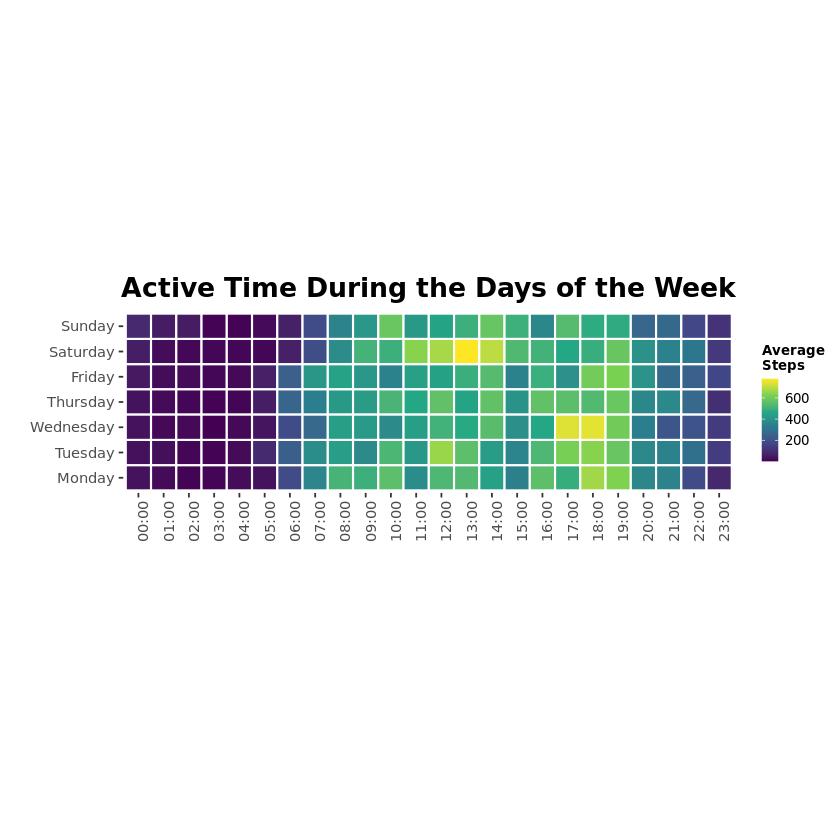

In [25]:
#A heat map will show active time during the days of the week
ggplot(hourly_steps_weekday, aes(x=time, y=weekday, fill=avg_steps))+
  geom_tile(color="white", lwd=.6, linetype=1)+
  scale_fill_viridis_c()+
  coord_fixed()+
  theme(axis.text.x = element_text(angle = 90),
        plot.title = element_text(hjust = 0.5, vjust = 1, size = 16, face="bold"),
        panel.background = element_blank(),
        legend.title = element_text(size=8, face="bold"),
        legend.text = element_text(size=8),
        legend.key.size = unit(0.35,'cm'))+
  labs(title = "Active Time During the Days of the Week",
       x=" ", y=" ", fill="Average\nSteps")

Berdasarkan bagan didapatkan wawasan sebagai berikut:
* Dalam beraktifitas selama satu hari dalam seminggu *user* memulai aktifitasnya dipagi hari pukul 07.00 untuk weekdays dan pukul 08.00 untuk weekend.
* Pada pukul 20.00-22.00 *User* sudah mulai beristirahat.
* Waktu paling aktif adalah pada hari sabtu pukul 11.00-14.00, dan hari rabu pukul 17.00-18.00.

### 4.5 Korelasi
Analisis pada hubungan antara jumlah langkah harian dengan kalori dan waktu tidur bertujuan untuk melihat apakah terdapat korelasi antara keduanya, sehingga didapatkan wawasan mengenai seberapa besar dampak dari jumlah langkah harian.   
#### 4.5.1 *Daily steps vs calories burned*

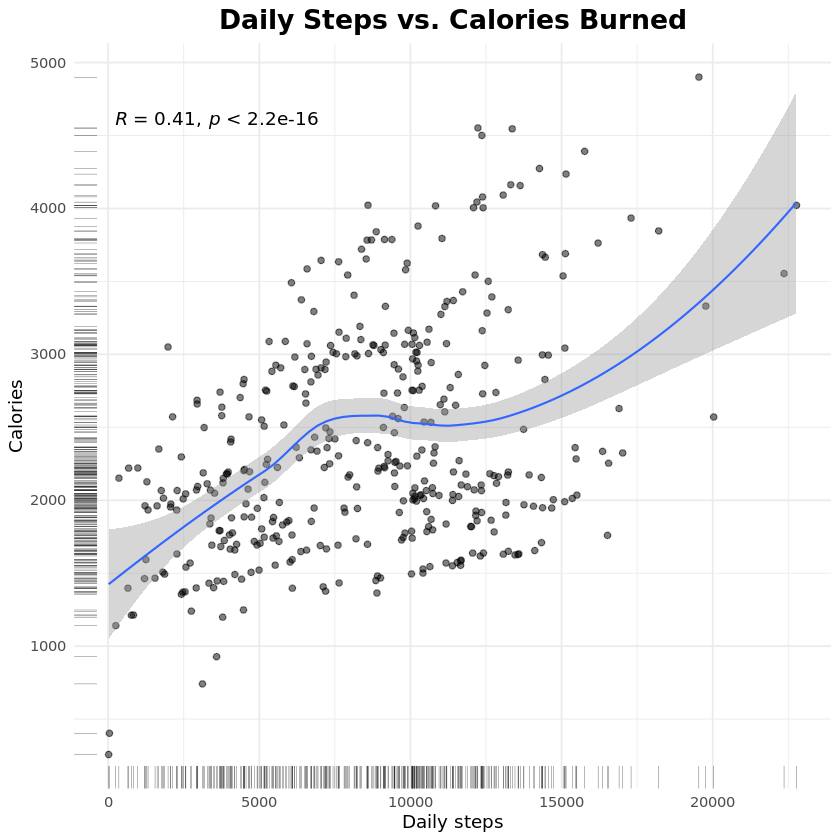

In [36]:
ggplot(all_activity_merged, aes(x=total_steps, y=calories))+
  geom_jitter(alpha=.5)+
  geom_rug(position = "jitter", size=.08)+
  geom_smooth(method = 'loess', formula = 'y ~ x', size=.6)+
  theme_minimal()+
  stat_cor(method = "pearson", label.x = 200, label.y = 4600)+
  theme(plot.title = element_text(hjust = 0.5, vjust = 1, size = 16, face="bold"))+
  labs(title = "Daily Steps vs. Calories Burned", x = "Daily steps", y = "Calories")

Bagan menunjukan bahwa korelasi antara langkah harian dengan kalori terbakar adalah berbanding lurus. Semakin banyak langkah  harian semakin besar pula kalori yang terbakar. Untuk mengetahui seberapa besar nilai respon antara kedua variabel tersebut, disini digunakan regresi linier. R = 0,41, mengindikasikan terdapatnnya korelasi antara kedua variabel.

#### 4.5.2 *Daily steps vs Minutes asleep*

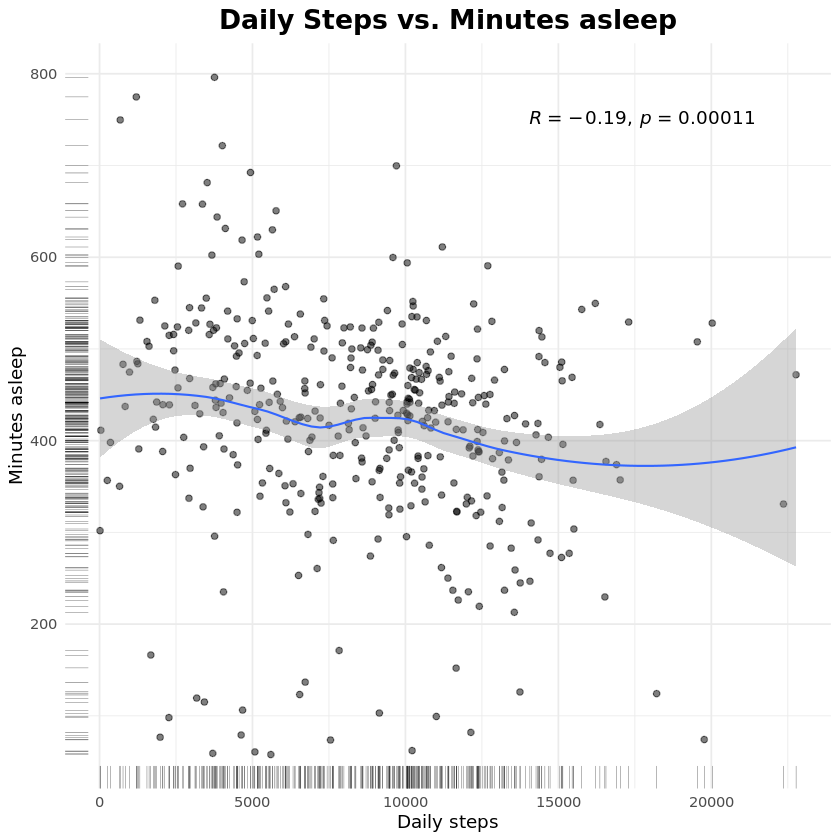

In [37]:
ggplot(all_activity_merged, aes(x=total_steps, y=total_minutes_asleep))+
  geom_jitter(alpha=.5)+
  geom_rug(position = "jitter", size=.08)+
  geom_smooth(method = 'loess', formula = 'y ~ x', size=.6)+
  theme_minimal()+
  stat_cor(method = "pearson", label.x = 14000, label.y = 750)+
  theme(plot.title = element_text(hjust = 0.5, vjust = 1, size = 16, face="bold"))+
  labs(title = "Daily Steps vs. Minutes asleep", x = "Daily steps", y = "Minutes asleep")

Tidak terdapatnya korelasi antara langkah harian dengan menit tidur. R=-19 mengindikasikan tidak ada korelasi antara kedua variabel.

### 4.6 Kebiasaan *user* dalam menggunakan *smart device*
Setelah dilakukan beberapa analisis mengenai cara *user* dalam memanfaatkan beberapa fitur yang ada pada *smart device*, saya ingin mengetahui kebiasaan *user* dalam mengunakan *smart device* secara keseluruhan. Pertama-tama *user* akan dikelompokan berdasarkan penggunaan setiap harinya dalam interval 31 hari, yang diantaranya:
* Penggunaan salama 1 hari sampai dengan 10 hari dikategorikan *low use*.
* Penggunaan salama 11 hari sampai dengan 20 hari dikategorikan *Mid use*.
* Penggunaan salama 21 hari sampai dengan 31 hari dikategorikan *High use*.

In [38]:
daily_use <- all_activity_merged %>% 
  group_by(id) %>% 
  summarize(record_days = sum(n())) %>% 
  mutate(usage = case_when(
    record_days >= 1 & record_days <= 10 ~ "Low use",
    record_days >= 11 & record_days <= 20 ~ "Mid use",
    record_days >= 21 & record_days <= 31 ~ "High use",
  ))
head(daily_use)

id,record_days,usage
<dbl>,<int>,<chr>
1503960366,25,High use
1644430081,4,Low use
1844505072,3,Low use
1927972279,5,Low use
2026352035,28,High use
2320127002,1,Low use


Membuat dataframe dengan nilai persen

In [39]:
daily_use_percent <- daily_use %>% 
  group_by(usage) %>% 
  summarise(user_count = n()) %>% 
  mutate(total_percent = scales::percent (user_count/sum(user_count)))
head(daily_use_percent)

usage,user_count,total_percent
<chr>,<int>,<chr>
High use,12,50%
Low use,9,38%
Mid use,3,12%


Memvisualisasikan distibrusi kebiasaan *user*

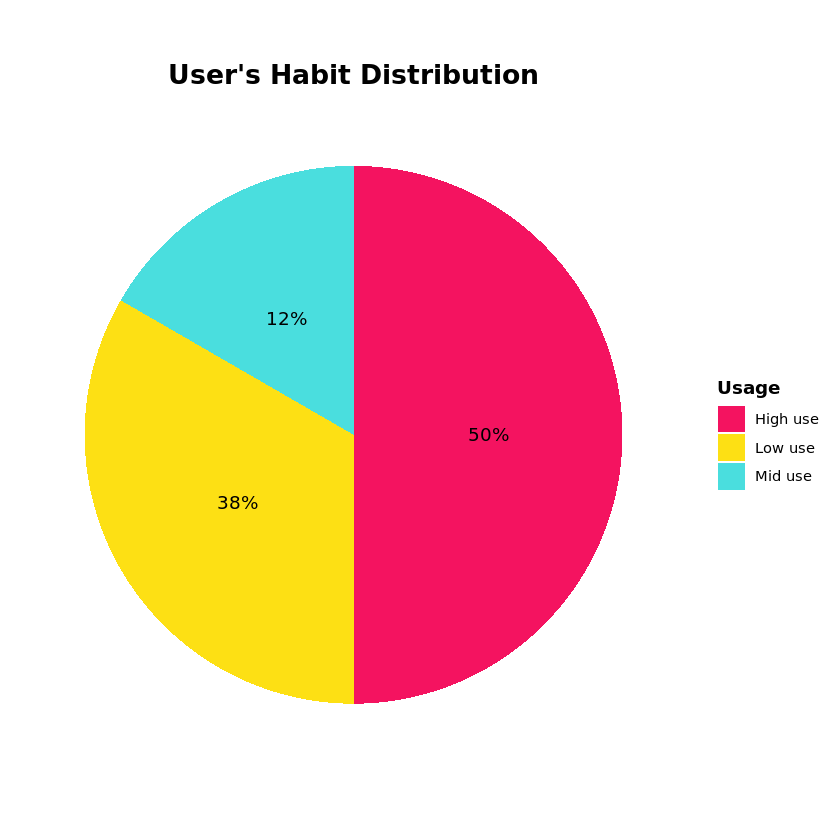

In [59]:
ggplot(data = daily_use_percent, aes(x="", y=total_percent, fill=usage))+
  geom_bar(stat = "identity", width=1)+
  geom_text(aes(label = total_percent),
            color="black",
            position = position_stack(vjust = 0.5),
            show.legend = FALSE)+
  coord_polar(theta = "y")+
  theme_minimal()+
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.border = element_blank(),
    panel.grid=element_blank(),
    axis.ticks = element_blank(),
    axis.text.x = element_blank(),
    legend.title = element_text(face="bold"),
    plot.title=element_text(hjust =0.5, vjust=1, size=16, face="bold"))+
  scale_fill_manual(values = c("#f41360","#fde014", "#4adede"))+
  labs(title = "User's Habit Distribution", fill="Usage")

Berdasarkan bagan dapat dianalisis:
* Selama interval 31 hari, setengah dari *user* terbiasa dengan menggunakan *smart device* setiap harinnya. 
* 38% *user* meenggunakan *smart device* mereka cukup sering, yaitu 11-20 hari.
* Hanya 12% saja *user* yang jarang dalam menggunakan *smart device* mereka, yaitu hanya 1-10 hari.

#### 4.6.1 Jumlah pengguna berdasarkan fitur *smart device*
Setelah menganalisis bagaimana *user* dalam menggunakan *smart device* mereka secara keseluruhan, saya ingin melihat bagaimana *user* menggunakan fitur yang tersedia.

In [60]:
feature_list <- c(
  "Activity Tracker",
  "Sleep Tracker",
  "Heart Rate",
  "Weight Log"
)

number_usage <- c(
  33,
  24,
  14,
  8
)

device_feature <- tibble(feature_list, number_usage) %>% 
  arrange(-number_usage)

Memvisualisasikan jumlah *user* berdasarkan fitur *smart device*.

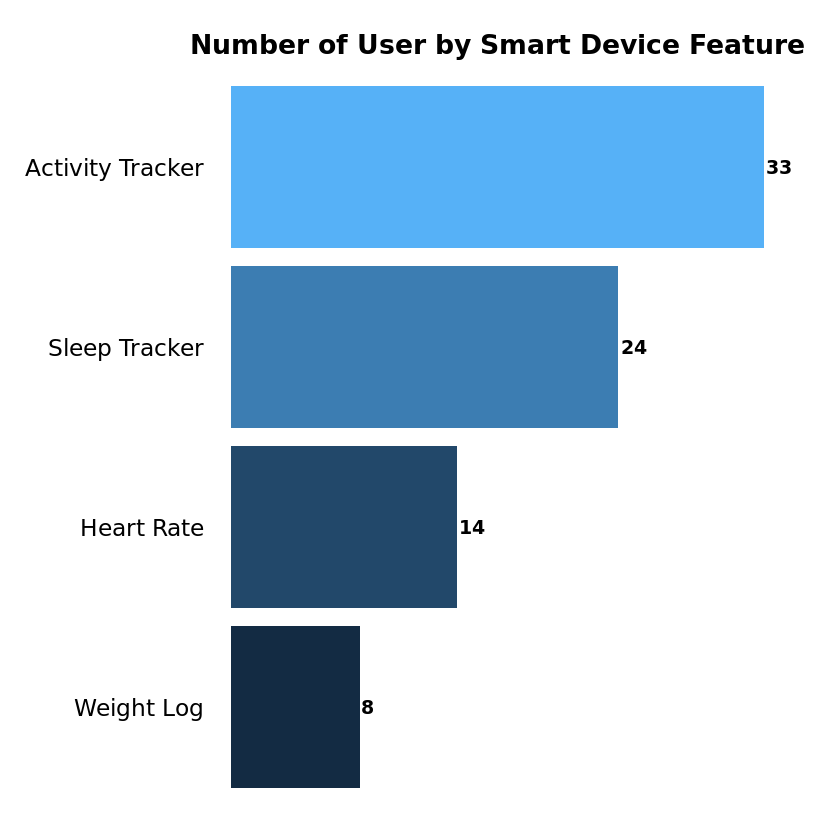

In [76]:
ggplot(device_feature, 
       aes(x = forcats::fct_reorder(feature_list, number_usage), 
           y = number_usage, fill = number_usage)) +
  coord_flip()+
  geom_col() +
  geom_text(aes(label=number_usage),
            hjust=-0.1, size=4, fontface="bold")+
  theme_void()+
  theme(
    axis.text.y = element_text(size = 14, hjust = 1),
    plot.margin = margin(15, 30, 15, 15),
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, vjust = 1, size=16, face="bold"))+
  labs(title="Number of User by Smart Device Feature")

Dapat dianalisis, fitur yang paling sering digunakan oleh *user* adalah *activity tracker* yang meliputi jumlah langkah harian, intensitas aktifitas, dan jumlah kalori terbakar. Fitur yang paling sedikit digunakan adalah *weight log* dan *heart rate*.

## 5. *Act*
Setelah dilakukan analisis pada data *FitBit Fitness Tracker*, yang berisikan tiga puluh pengguna yang memenuhi syarat dan menyetujui untuk mengirimkan data pelacak pribadi, termasuk aktivitas fisik, detak jantung, dan pemantauan tidur. Data yang digunakan cukup baik, karena memiliki variabel-variabel yang merepresentasikan aktivitas harian. Data yang digunakan pun mamiliki kekurangan terutama pada sampel yang terbatas, sehingga memungkinkannya terjadi bias karna jumlah sampel tidak mewakili seluruh populasi dan tidak memiliki detail demografik. 

Berdasarkan temuan dari analisis, berikut rekomendasi yang dapat membantu tim pemasaran dalam menyusun strategi pemasaran produk Bellabeat:

#### 1. Target Pemasaran
Bellabeat merupakan produk *tracker* kesehatan yang berfokus untuk memberdayakan wanita dengan pengetahuan tentang kesehatan dan kebiasaan mereka sendiri. Berdasarkan hal tersebut yang menjadi target utama produk ini adalah remaja dan wanita dewasa. Pada dataset yang digunakan tidak diketahui gender dari para partisipan, sehingga saya asumsikan semua data merepresentasikan semua gender. 

Terdapat 2 target utama pemasaran yang dapat dilakukan, yaitu:
* Wanita karir yang sangat sibuk setiap harinya atau full-time job, yang terkadang mereka lupa akan kesadaran atas kesehatan dan kebiasaan hidup sehat.
* Para remaja yang tengah menempuh pendidikan, hal yang sering dilupakan oleh mereka adalah kesadaran atas aktifitas harian yang dapat memaksimalkan pertumbuhan mereka.

Terdapat temuan bahwa *sedentary time* yang terlalu lama, secara rata-rata pengguna menghabiskan waktu selama 11,86 jam tanpa melakukan aktifitas fisik. Hal ini sesuai dengan kedua target utama pemasaran, dimana wanita karir dan pelajar yang seringkali meghabiskan waktu diam didepan komputer, meeting, bangku kelas, dan juga fokus kerja lainnya. Kedua target ini membutuhkan perubahan dalam kebisaan mereka dalam beraktifitas demi menunjang pola hidup sehat.

#### 2. Produk Bellabeat
Setelah mengetahui bagaimana kebisaan para *user* menggunakan *smart device* mereka, maka berikut beberapa rekomendasi yang dapat diterapkan pada produk Bellabeat meliputi applikasi Bellabeat, *Leaf* dan *Time*.
* Berdasarkan __[Health Information for Western Australians](https://www.healthywa.wa.gov.au/Articles/S_T/Sedentary-behaviour#:~:text=Sedentary%20behaviour%20is%20sitting%20or,at%20school)__ waktu duduk lebih dari 7-10 jam dalam sehari dapat berdampak buruk bagi kesehatan, meskipun aktifitas fisik telah terpenuhi. Dengan mengingat secara rata-rata *user* menghabiskan waktu selama 11,86 jam tanpa melakukan aktifitas apapun, maka Bellabeat perlu memberikan peringatan secara berkala kepada pengguna Bellabeat setiap kali mereka berdiam diri/duduk terlalu lama.
* Untuk mencapai targat 10.000 langkah dalam sehari untuk mencapai pola hidup sehat perlu memang tidak mudah. Bellabeat perlu memberikan suatu penghargaan kepada para *user* yang mampu mancapai target. Penghargaan yang diberikan dapat berupa poin yang dapat dikumpulkan, sehingga Bellabeat perlu membuat sistem ranking untuk menunjang hal tersebut. Kemudian *user* yang memiliki rank tertingi akan mendapatkan keuntungan dari Bellabeat berupa diskon, hadiah, dan lain sebagainya.
* Berdasarkan temuan pada kebiasaan *user* dalam menggunakan *smart device* mereka, dimana selama interval 31 hari, 50% dari *user* terbiasa dengan menggunakan *smart device* setiap harinnya. 38% *user* meenggunakan *smart device* mereka cukup sering, yaitu 11-20 hari. Hanya 12% saja *user* yang jarang dalam menggunakan *smart device* mereka, yaitu hanya 1-10 hari. Bellabeat perlu untuk mempromosikan kembali fitur tambahan dari produk Bellabeat, diantaranya:
  1. Kapasitas baterai yang besar.
  2. Tahan air.
  3. Pilihan desain yang bervariasi.